In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='7277e3bb-3263-42c6-ad28-1dd39f45a854', project_access_token='p-eb83b8006b6f565f24114be4a6dced016e917565')
pc = project.project_context


# IBM Data Science Capstone Jupyter Notebook #1:

Data Examination and Exploratory Analysis
Author: Narendra Jayaram Date: 09/01/2020

This project uses data from previous vehicle collisions to try and build a machine learning model that predicts the severity of accidents based on certain features.   
This notebook will focus on data examination, initial feature selection and exploratory analysis.

The data comes from collision records recorded by the Seattle Police Department from 2004 through May of 2020


In [7]:
#import required libraries for handling and visualizing data
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#more libraries from the sklearn package will be imported later for modeling and evaluation
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fc970d3ef8cd46d4a2428def16cea59d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='USMY-agKGfme_dlapbsBuhXMCVan-ZqcoC1QX3nYsHMy',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fc970d3ef8cd46d4a2428def16cea59d.get_object(Bucket='courseracapstonenj-donotdelete-pr-bsbb2ht9aiegvj',Key='Data_Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dt = pd.read_csv(body)
dt.head(3)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [9]:
dt.shape

(194673, 38)

In [10]:

body = client_fc970d3ef8cd46d4a2428def16cea59d.get_object(Bucket='courseracapstonenj-donotdelete-pr-bsbb2ht9aiegvj',Key='Data_Collisions_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test1 = pd.read_csv(body)
test1.head(3)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [11]:
test1.shape

(194673, 37)

#  1.0 Data Exploration

## We will do some preliminary examination of the dataset to: 

understand the dataset (incl. the datatypes of different columns)  
identify possible independent parameters that could be useful for the model   
identify what data cleansing and pre-processing might be required   


In [12]:
coll_1 = dt[dt['SEVERITYCODE']==1].count()['SEVERITYCODE']
coll_2 = dt[dt['SEVERITYCODE']==2].count()['SEVERITYCODE']
print('Type 1 collisions (property damage) = ', coll_1)
print('Type 2 collisions (with injury) = ', coll_2)
print('Ratio of Collisions with property damage only to those with injuries: '+'{:.2f}'.format(coll_1/coll_2))
print('Ratio of Collisions with injuries to those with property damage: '+'{:.2f}'.format(coll_2/coll_1))


Type 1 collisions (property damage) =  136485
Type 2 collisions (with injury) =  58188
Ratio of Collisions with property damage only to those with injuries: 2.35
Ratio of Collisions with injuries to those with property damage: 0.43


In [13]:
dt.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [14]:

#first lets look at the two date/time columns for format, samples, etc.

print(dt[['INCDATE','INCDTTM']].dtypes)

print(dt[['INCDATE','INCDTTM']].describe())

dt[['INCDATE','INCDTTM']].head(20)

INCDATE    object
INCDTTM    object
dtype: object
                       INCDATE    INCDTTM
count                   194673     194673
unique                    5985     162058
top     2006/11/02 00:00:00+00  11/2/2006
freq                        96         96


,INCDATE,INCDTTM
0,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM
1,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM
2,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM
3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM
4,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM
5,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM
6,2008/12/09 00:00:00+00,12/9/2008
7,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM
8,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM
9,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM


In [15]:
#the format for both columns is 'object' and not the datetime type that we would like and there are issues with the timestamp
#this may be and issue, but lets leave for now

#lets look at the volume of incidents overtime... first we need to convert the time to the right format.
#lets use the INCDTTM column since that atleast captures the time for some records
dt['DATETIME']=dt['INCDTTM'].astype('datetime64[ns]')
print(dt['DATETIME'].dtypes)
print(dt['DATETIME'].describe())
dt[['DATETIME']].head(15)

datetime64[ns]
count                  194673
unique                 162058
top       2006-11-02 00:00:00
freq                       96
first     2004-01-01 00:00:00
last      2020-05-20 00:00:00
Name: DATETIME, dtype: object


,DATETIME
0,2013-03-27 14:54:00
1,2006-12-20 18:55:00
2,2004-11-18 10:20:00
3,2013-03-29 09:26:00
4,2004-01-28 08:04:00
5,2019-04-20 17:42:00
6,2008-12-09 00:00:00
7,2020-04-15 17:47:00
8,2006-06-15 13:00:00
9,2006-03-20 15:49:00


In [16]:
# group the incidents by year and severity classifiation for plotting
df_annual = dt.groupby([dt.DATETIME.dt.year,'SEVERITYCODE']).size().unstack(fill_value=0)
df_annual.head(24)

SEVERITYCODE,1,2
DATETIME,,
2004,8218,3647
2005,10665,4450
2006,10838,4350
2007,10439,4017
2008,9893,3767
2009,8356,3378
2010,7563,3245
2011,7820,3099
2012,7440,3467


In [17]:
#group the incidents by year and severity classifiation for plotting
df_month = dt.groupby([dt.DATETIME.dt.month,'SEVERITYCODE']).size().unstack(fill_value=0)
df_month.head(24)

SEVERITYCODE,1,2
DATETIME,,
1,11704,4703
2,10293,4097
3,11415,4735
4,11216,4762
5,11567,5196
6,11638,4928
7,11227,5137
8,11214,5082
9,11053,4811


In [18]:
#reformat the dataframe
df_annual.reset_index(drop=False,inplace=True)
df_annual.columns = ['Year','Property','Injury']
df_annual.head()

,Year,Property,Injury
0,2004,8218,3647
1,2005,10665,4450
2,2006,10838,4350
3,2007,10439,4017
4,2008,9893,3767


In [19]:
#reformat the dataframe
#df_month.reset_index(drop=False,inplace=True)
#df_month.columns = ['month','Property','Injury']
df_month.head(24)

SEVERITYCODE,1,2
DATETIME,,
1,11704,4703
2,10293,4097
3,11415,4735
4,11216,4762
5,11567,5196
6,11638,4928
7,11227,5137
8,11214,5082
9,11053,4811


In [20]:
#lets add a Total colum to sum the number of total incidents per year, and calculate the fraction that are severe
df_annual['Total'] = df_annual['Property'] + df_annual['Injury']
df_annual['Severe_rate'] = df_annual['Injury'] / df_annual['Total']
#drop the 2020 row since the year is not complete... we want to look at the recent trend
df_annual.drop(df_annual.tail(1).index,inplace=True)
df_annual.tail()

,Year,Property,Injury,Total,Severe_rate
11,2015,9243,3752,12995,0.288726
12,2016,7945,3714,11659,0.318552
13,2017,7454,3419,10873,0.314449
14,2018,7061,3358,10419,0.322296
15,2019,6350,3062,9412,0.325329


#### Correlation of the features are potted for visualisation

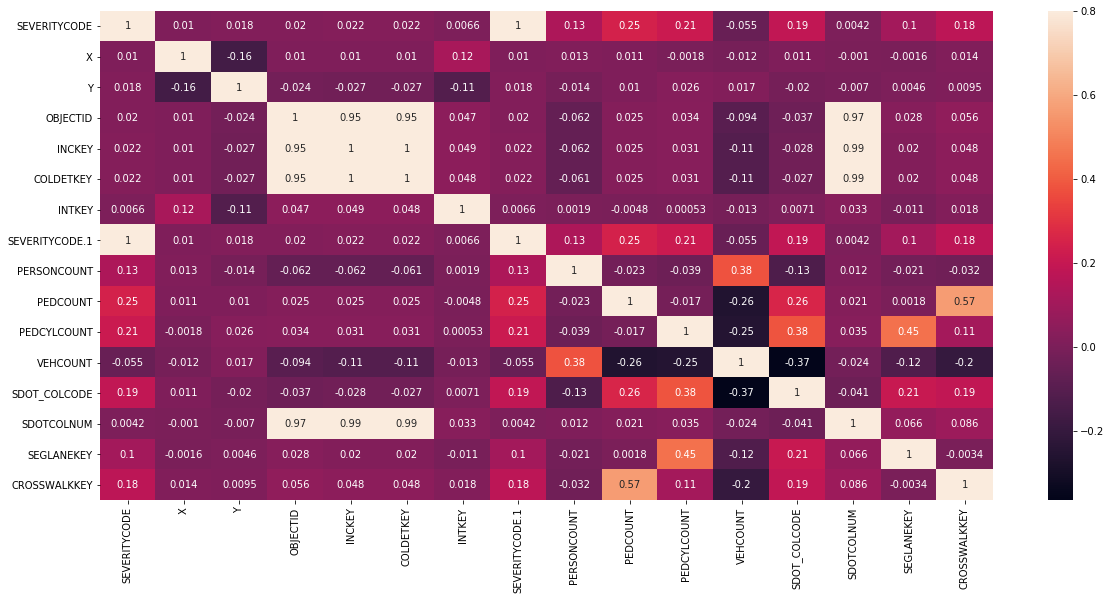

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = dt.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [22]:
# train_nas = dt.isnull().sum().sort_values(descending=0)
train_nas = dt.isnull().sum().sort_values(ascending=False)
train_nas

PEDROWNOTGRNT     190006
EXCEPTRSNDESC     189035
SPEEDING          185340
INATTENTIONIND    164868
INTKEY            129603
EXCEPTRSNCODE     109862
SDOTCOLNUM         79737
JUNCTIONTYPE        6329
X                   5334
Y                   5334
LIGHTCOND           5170
WEATHER             5081
ROADCOND            5012
ST_COLDESC          4904
COLLISIONTYPE       4904
UNDERINFL           4884
LOCATION            2677
ADDRTYPE            1926
ST_COLCODE            18
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
OBJECTID               0
DATETIME               0
VEHCOUNT               0
SEVERITYCODE.1         0
SEVERITYDESC           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
HITPARKEDCAR           0
INCDATE                0
INCDTTM                0
SDOT_COLCODE           0
SDOT_COLDESC           0
SEGLANEKEY             0
CROSSWALKKEY           0
SEVERITYCODE           0
dtype: int64

In [23]:
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending = False)

PEDROWNOTGRNT     190006
EXCEPTRSNDESC     189035
SPEEDING          185340
INATTENTIONIND    164868
INTKEY            129603
EXCEPTRSNCODE     109862
SDOTCOLNUM         79737
JUNCTIONTYPE        6329
X                   5334
Y                   5334
LIGHTCOND           5170
WEATHER             5081
ROADCOND            5012
ST_COLDESC          4904
COLLISIONTYPE       4904
UNDERINFL           4884
LOCATION            2677
ADDRTYPE            1926
ST_COLCODE            18
dtype: int64

In [24]:
train_nas = train_nas[train_nas==0]
train_nas.sort_values
train_nas

Series([], dtype: int64)

# Differentiate numerical features (minus the target) and categorical features

In [25]:

categorical_features = dt.select_dtypes(include=['object']).columns
categorical_features

Index(['REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR'],
      dtype='object')

In [26]:
numerical_features = dt.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY',
       'SEVERITYCODE.1', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'DATETIME'],
      dtype='object')

In [27]:
numerical_features = numerical_features.drop("SEVERITYCODE")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 16
Categorical features : 22


In [28]:

#group the incidents by year and severity classifiation for plotting
df_annual = dt.groupby([dt.DATETIME.dt.year,'SEVERITYCODE']).size().unstack(fill_value=0)
df_annual.head()

SEVERITYCODE,1,2
DATETIME,,
2004,8218,3647
2005,10665,4450
2006,10838,4350
2007,10439,4017
2008,9893,3767


In [29]:

#reformat the dataframe
df_annual.reset_index(drop=False,inplace=True)
df_annual.columns = ['Year','Property','Injury']
df_annual.head()

,Year,Property,Injury
0,2004,8218,3647
1,2005,10665,4450
2,2006,10838,4350
3,2007,10439,4017
4,2008,9893,3767


In [30]:
#lets add a Total colum to sum the number of total incidents per year, and calculate the fraction that are severe
df_annual['Total'] = df_annual['Property'] + df_annual['Injury']
df_annual['Severe_rate'] = df_annual['Injury'] / df_annual['Total']
#drop the 2020 row since the year is not complete... we want to look at the recent trend
df_annual.drop(df_annual.tail(1).index,inplace=True)
df_annual.tail()

,Year,Property,Injury,Total,Severe_rate
11,2015,9243,3752,12995,0.288726
12,2016,7945,3714,11659,0.318552
13,2017,7454,3419,10873,0.314449
14,2018,7061,3358,10419,0.322296
15,2019,6350,3062,9412,0.325329


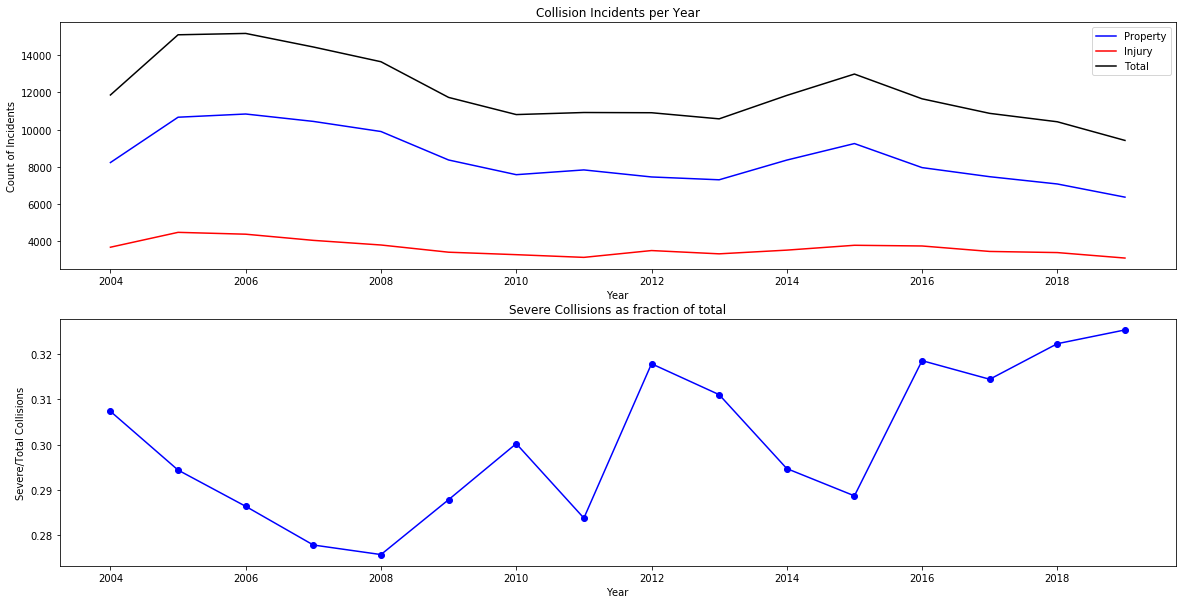

In [31]:

#lets plot the property and injury counts and rate of severe (injury) collisions versus year
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

ax1.plot('Year','Property',data=df_annual,marker='',color='blue')
ax1.plot('Year','Injury',data=df_annual,marker='',color='red')
ax1.plot('Year','Total',data=df_annual,marker='',color='k')
ax1.set(title='Collision Incidents per Year',xlabel = 'Year',ylabel='Count of Incidents')
ax1.legend()

ax2.plot('Year','Severe_rate',data=df_annual,marker='o',color='blue')
ax2.set(title='Severe Collisions as fraction of total',xlabel='Year',ylabel='Severe/Total Collisions')

plt.show()

### As we can see from the above chart, while the number of total incidents has decreased every year since 2015, the number of incidents where injuries occur has stayed mostly flat, accounting for a higher percentage of the total volume.    

Building a model to predict the severity of collisions could benefit the Seattle DOT in a couple ways:

* identifying the factors that most contribute to severe collisions, allowing more targetted improvements and changes
* providing a means to quantify (evaluate) and select improvements options with the most benefit (reduction in severe incidents)
* allow coordination with emergency response services on resource optimization and development of decision-support tools for dispatching (where response is most critical, etc).

#  lets plot the fatalities (property and injury counts) and rate of severe (injury) collisions versus year

In [33]:
df_annual1 = dt.groupby([dt.DATETIME.dt.year,'SEVERITYCODE']).size().unstack(fill_value=0)
df_annual1.head()

SEVERITYCODE,1,2
DATETIME,,
2004,8218,3647
2005,10665,4450
2006,10838,4350
2007,10439,4017
2008,9893,3767


In [34]:
# df_annual1['Total'] = dt['PEDCOUNT'] + dt['PEDCYLCOUNT'] + dt['CROSSWALKKEY']
# df_annual1['Severe_rate'] = df_annual['Injury'] / df_annual['Total']
# df_annual1.head(25)

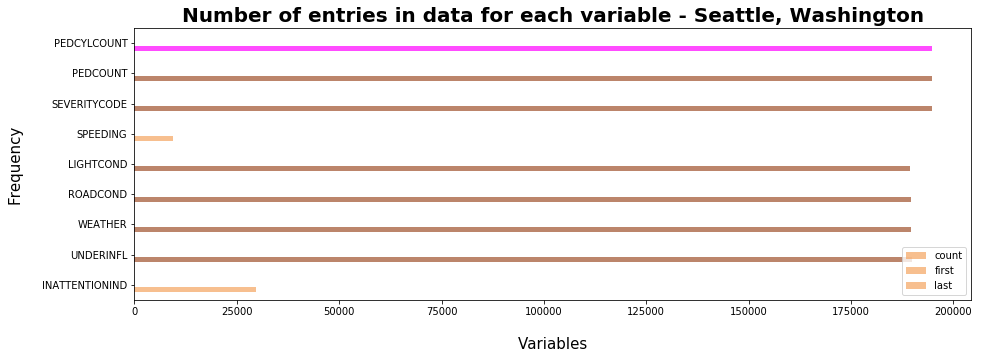

<Figure size 432x288 with 0 Axes>

In [35]:
#Descriptive Stats
descriptive_stats= dt.describe(include="all")


    #Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE","PEDCOUNT","PEDCYLCOUNT"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()


color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna','sienna','magenta']
descriptive_stats_plot.plot(kind='barh',alpha=0.70,color=[color_yo],figsize=(15,5))
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()
plt.savefig("barh_plot_matplotlib_descending_order_Python.png")

### Features speed and Inattentionind as low values , rest features have entires count well.

In [36]:
#lets keep exploring the data.. for simplicity, lets create a new df with the features that we want only

df_exp = dt[['DATETIME','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL',
                'WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]
print(df_exp.shape)
df_exp.head()

(194673, 13)


,DATETIME,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,2013-03-27 14:54:00,Angles,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,2
1,2006-12-20 18:55:00,Sideswipe,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,1
2,2004-11-18 10:20:00,Parked Car,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,1
3,2013-03-29 09:26:00,Other,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,1
4,2004-01-28 08:04:00,Angles,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,2


Text(0, 0.5, 'Collision Type')

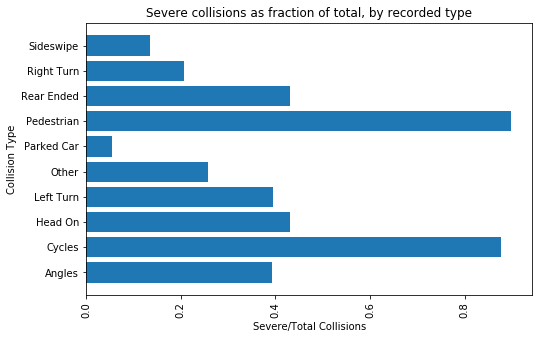

In [37]:

#now lets explore severity versus the different types of collisions that occur
df_type = df_exp.groupby(['COLLISIONTYPE','SEVERITYCODE']).size().unstack(fill_value=0)
df_type.reset_index(drop=False,inplace=True)
# df_type.sort_index(ascending=False)
# df_type.sort_values('COLLISIONTYPE')
df_type.columns = ['Type','Property','Injury']
df_type['Total'] = df_type['Property'] + df_type['Injury']
df_type['inj_rate'] = df_type['Injury'] / df_type['Total']

plt.figure(figsize=(8,5))
plt.barh(df_type['Type'],df_type['inj_rate'])
plt.title('Severe collisions as fraction of total, by recorded type')
plt.xlabel('Severe/Total Collisions')
plt.xticks(rotation=90)
plt.ylabel('Collision Type')




## Pedestrian and Cycles have the high injury rate 

Text(0, 0.5, 'WEATHER')

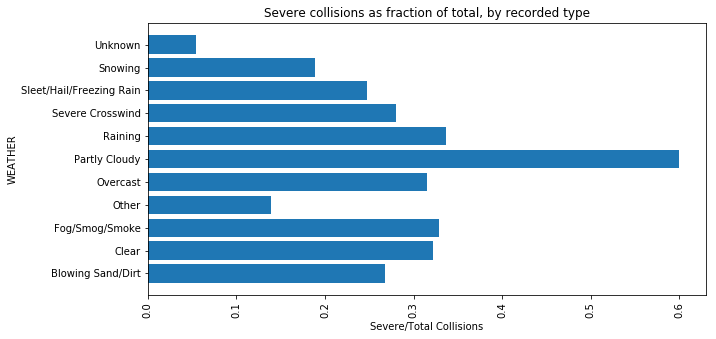

In [38]:

#now lets explore severity versus the different types of Weather that occur
df_type = df_exp.groupby(['WEATHER','SEVERITYCODE']).size().unstack(fill_value=0)
df_type.reset_index(drop=False,inplace=True)
df_type.columns = ['Type','Property','Injury']
df_type['Total'] = df_type['Property'] + df_type['Injury']
df_type['inj_rate'] = df_type['Injury'] / df_type['Total']

plt.figure(figsize=(10,5))
plt.barh(df_type['Type'],df_type['inj_rate'])
plt.title('Severe collisions as fraction of total, by recorded type')
plt.xlabel('Severe/Total Collisions')
plt.xticks(rotation=90)
plt.ylabel('WEATHER')

## Partly cloudy has the high injury rate

Text(0, 0.5, 'ROADCOND')

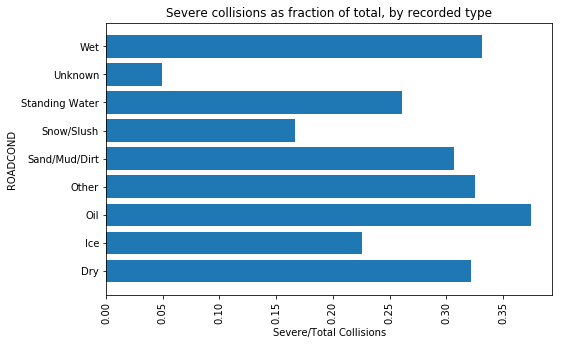

In [39]:

#now lets explore severity versus the different types of collisions that occur
df_type = df_exp.groupby(['ROADCOND','SEVERITYCODE']).size().unstack(fill_value=0)
df_type.reset_index(drop=False,inplace=True)
df_type.columns = ['Type','Property','Injury']
df_type['Total'] = df_type['Property'] + df_type['Injury']
df_type['inj_rate'] = df_type['Injury'] / df_type['Total']

plt.figure(figsize=(8,5))
plt.barh(df_type['Type'],df_type['inj_rate'])
plt.title('Severe collisions as fraction of total, by recorded type')
plt.xlabel('Severe/Total Collisions')
plt.xticks(rotation=90)
plt.ylabel('ROADCOND')

## oil and Wet Road has the high injury rate

Text(0, 0.5, 'LIGHTCOND')

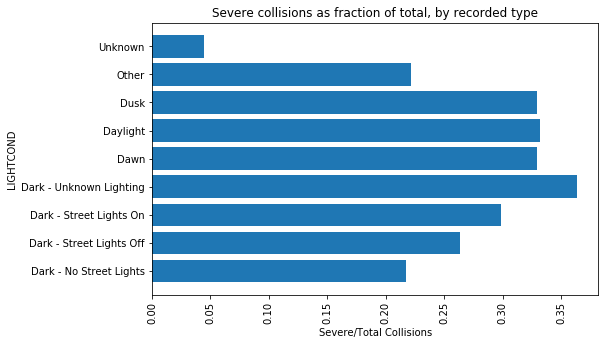

In [40]:
#now lets explore severity versus the different types of collisions that occur
df_type = df_exp.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack(fill_value=0)
df_type.reset_index(drop=False,inplace=True)
df_type.columns = ['Type','Property','Injury']
df_type['Total'] = df_type['Property'] + df_type['Injury']
df_type['inj_rate'] = df_type['Injury'] / df_type['Total']

plt.figure(figsize=(8,5))
plt.barh(df_type['Type'],df_type['inj_rate'])
plt.title('Severe collisions as fraction of total, by recorded type')
plt.xlabel('Severe/Total Collisions')
plt.xticks(rotation=90)
plt.ylabel('LIGHTCOND')

## Dark-unknown lighting has the high injury rate

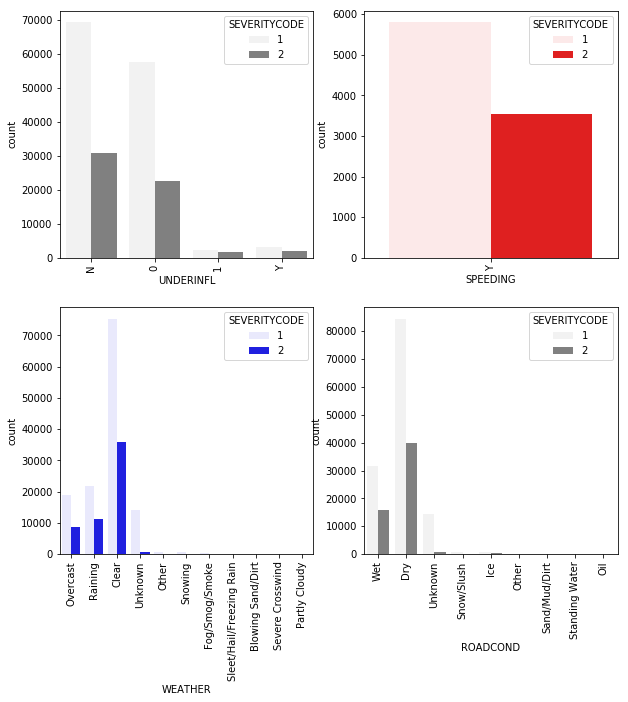

In [41]:

#visualization of the distribution of injury & property type collisions for different characteristics
#including, influence, speeding, weather and road condition

import matplotlib
matplotlib.colors
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='UNDERINFL',hue='SEVERITYCODE',data=df_exp, ax=ax[0,0],color="Grey")
sns.countplot(x='SPEEDING',hue='SEVERITYCODE',data=df_exp,ax=ax[0,1],color="Red")
sns.countplot(x='WEATHER',hue='SEVERITYCODE',data=df_exp,ax=ax[1,0],color="Blue")
sns.countplot(x='ROADCOND',hue='SEVERITYCODE',data=df_exp,ax=ax[1,1],color="Grey")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

## 3.0 Data Cleansing and Preparation
Based on the feature selection table above, the following data cleansing and prep will be completed:

drop PEDCOUNT / PEDCYLCOUNT / WEATHER / ROADCOND  / LIGHTCOND    
drop rows where COLLISIONTYPE, INATTENTIONIND, UNDERINFL or SPEEDING are blank   
drop rows where PERSONCOUNT is 0   
drop rows where the timestamp is 00:00:00    

create column to identify if time is during either rushhour (5-8 or 15-18), then drop DATETIME   
create column to identify if PERSONCOUNT is >=3, then drop PERSONCOUNT   
create column to identify if VEHCOUNT is 2 or not, then drop VEHCOUNT   
for INATTENTIONIND, convert N to 0 and Y to 1   
for UNDERINFL, convert N to 0 and Y to 1   
for SPEEDING, convert N to 0 and Y to 1   
transform COLLISION type to one-hot encoding using get_dummies   

In [42]:
df_exp.head()

,DATETIME,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,2013-03-27 14:54:00,Angles,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,2
1,2006-12-20 18:55:00,Sideswipe,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,1
2,2004-11-18 10:20:00,Parked Car,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,1
3,2013-03-29 09:26:00,Other,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,1
4,2004-01-28 08:04:00,Angles,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,2


In [43]:
#lets look at collisions vs PERSONCOUNT (number of people involved)... first lets see the range of different values
df_exp['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

[(-1, 11)]

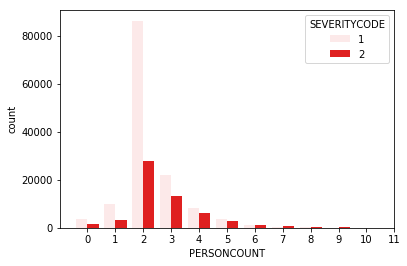

In [44]:

#lets graph the count of property vs injury collisions for the different personcounts
#lets cut the graph off at 11 which is the last count with >50 samples
ax = sns.countplot(x='PERSONCOUNT',hue='SEVERITYCODE',data=df_exp,color='red')
ax.set(xlim=(-1,11))

#### >>First, clean the data to remove samples where the count of people is 0. Then, transform this feature to identify if there are more or less than 3 people involved (1 or 0, respectively) and use it in the model.

#### it is unclear what to make of the samples with really high counts of people. Were these incidents incorrectly recorded or did they involved massive pileups, or busses of people? Similarly, there are over 5500 samples where the person count is 0. The majority of cases fall in the range of 1-5 people involved. It is probably best to focus on this area for modeling.

In [45]:
#let apply the same visualization to PEDCOUNT
df_exp['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

[(-1, 4)]

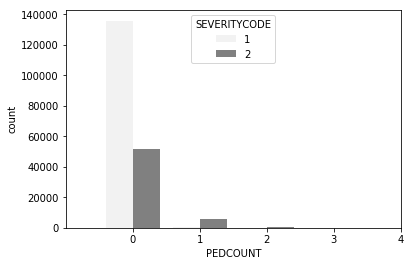

In [46]:

#graph a countplot to see the distribution
ax = sns.countplot(x='PEDCOUNT',hue='SEVERITYCODE',data=df_exp,color = 'Grey')
ax.set(xlim=(-1,4))

### when the pedcount is >1 (at least one pedestrian is involved) injuries are more likely to occur. However, this is already captured by the 'Pedestrian' collision type, which is already in the feature set.

[(-1, 3)]

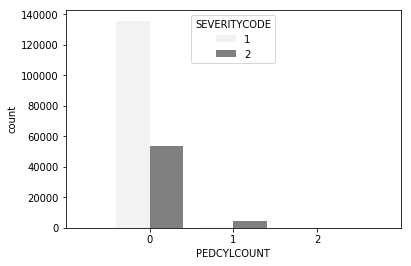

In [47]:

#bicylce counts..
df_exp['PEDCYLCOUNT'].value_counts()
#count plot of severity
ax = sns.countplot(x='PEDCYLCOUNT',hue='SEVERITYCODE',data=df_exp,color = 'Grey')
ax.set(xlim=(-1,3))

### When bicycles are involved, injuries are more likely to occur.
>>The 'Cycles' COLLISIONTYPE already introduces this relationship.

[(-1, 7)]

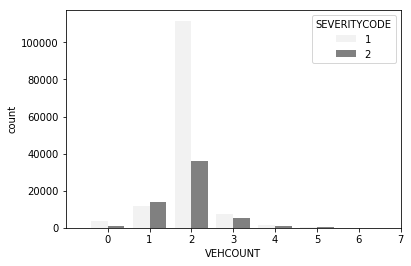

In [48]:
#vehicle count...
df_exp['VEHCOUNT'].value_counts()
#count plot
ax = sns.countplot(x='VEHCOUNT',hue='SEVERITYCODE',data=df_exp,color = 'Grey')
ax.set(xlim=(-1,7))

In [49]:
#what does the distribution of collision types show for those involving only 1 vehicle?
df_exp[df_exp['VEHCOUNT']==1].groupby(['COLLISIONTYPE','SEVERITYCODE']).size().unstack(fill_value=0)

SEVERITYCODE,1,2
COLLISIONTYPE,,
Angles,3,24
Cycles,660,4479
Head On,1,1
Left Turn,2,16
Other,10298,3688
Parked Car,10,5
Pedestrian,664,5868
Rear Ended,1,1
Right Turn,0,3


####  Collisions involving 2 vehicles are most common and therefore align to the property/injury proportion; collisions with 1 vehicle have high injury classification rate, but are often represented by ped/bike incidents which are already represented by the COLLISIONTYPE. 
#### Still overall, injuries seem to be more common when the vehicle count is something other than 2. Lets create a feature representing whether the collision has 2 vehicles or not (0,1).

In [50]:
#now lets look at the some of the features that capture possible driver distractions, starting with inattentiveness
df_exp['INATTENTIONIND'].value_counts()
#this is likely because they are empty (blank).. lets assume that blank means 'No' and adjust the data
df_exp['INATTENTIONIND'].fillna('N',inplace=True)
df_exp['INATTENTIONIND'].value_counts()

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

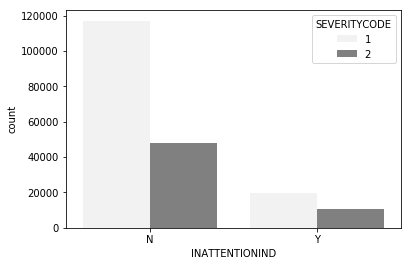

In [51]:
#look at the severity distribution
ax = sns.countplot(x='INATTENTIONIND',hue='SEVERITYCODE',data=df_exp, color = 'Grey')

In [52]:

df_attn = df_exp.groupby(['INATTENTIONIND','SEVERITYCODE']).size().unstack(fill_value=0)
df_attn.reset_index(drop=False,inplace=True)
df_attn.columns = ['State','Property','Injury']
df_attn['Total'] = df_attn['Property'] + df_attn['Injury']
print('Rate of Injury for inattentive collisions (Y): '+'{:.2f}'.format(df_attn.loc[0,'Injury']/df_attn.loc[0,'Total']))
print('Rate of Injury for attentive collisions (N): '+'{:.2f}'.format(df_attn.loc[1,'Injury']/df_attn.loc[1,'Total']))
df_attn

Rate of Injury for inattentive collisions (Y): 0.29
Rate of Injury for attentive collisions (N): 0.35


,State,Property,Injury,Total
0,N,117077,47791,164868
1,Y,19408,10397,29805


#### (INATTENTIONIND) Observation: collisions due to inattentive driving are slightly more likely to result in injuries than those where inattentiveness is not an issue; however, neither are more likely to result in injury than not.
  >> Injuries occur in a higher percentage of collisions where inattentive driving is present, 
  ### so lets use this as a feature. (INATTENTIONIND)

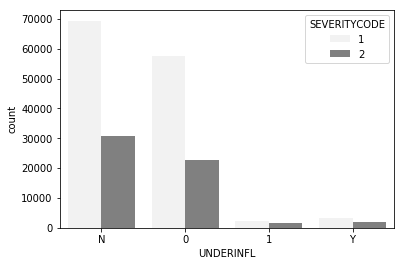

In [53]:

#lets observe the value counts for influenced driving
ax = sns.countplot(x='UNDERINFL',hue='SEVERITYCODE',data=df_exp, color = 'Grey')

In [54]:
#what about driving under the influence?
df_exp['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [55]:
df_infl = df_exp.groupby(['UNDERINFL','SEVERITYCODE']).size().unstack(fill_value=0)
df_infl.reset_index(drop=False,inplace=True)
df_infl.columns = ['State','Property','Injury']
df_infl['Total'] = df_infl['Property'] + df_infl['Injury']
print('Rate of Injury for influenced collisions (Y, 1): '+'{:.2f}'.format(
    (df_infl.loc[1,'Injury']+df_infl.loc[3,'Injury'])/(df_infl.loc[1,'Total']+df_infl.loc[3,'Total'])))
print('Rate of Injury for sober collisions (N, 0): '+'{:.2f}'.format(
    (df_infl.loc[0,'Injury']+df_infl.loc[2,'Injury'])/(df_infl.loc[0,'Total']+df_infl.loc[2,'Total'])))

Rate of Injury for influenced collisions (Y, 1): 0.39
Rate of Injury for sober collisions (N, 0): 0.30


###  (UNDERINFL pt2) Observation: collisions where drugs or alcohol were involved resulted in injury at a higher rate than collisions where no drugs or alcohol were involved.
 ## Lets include this as a feature. ( UNDERINFL)

In [56]:
 ### lets look at the outcomes for collisions where speeding is involved
df_exp['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [57]:
#similar to the INATTENTIONIND feature, we have missing samples due to blank values. lets assume that blank means 'No'
df_exp['SPEEDING'].fillna('N',inplace=True)
df_exp['SPEEDING'].value_counts()

N    185340
Y      9333
Name: SPEEDING, dtype: int64

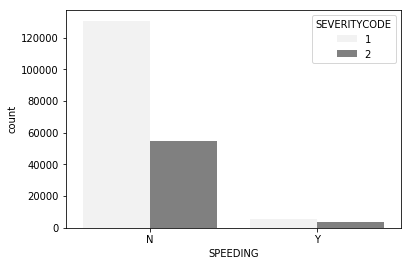

In [58]:
#and now the severity distribution
ax = sns.countplot(x='SPEEDING',hue='SEVERITYCODE',data=df_exp, color = 'Grey')

In [59]:
#calculate the injury collision rates speeding vs no speeding samples
df_speed = df_exp.groupby(['SPEEDING','SEVERITYCODE']).size().unstack(fill_value=0)
df_speed.reset_index(drop=False,inplace=True)
df_speed.columns = ['Speeding','Property','Injury']
df_speed['Total'] = df_speed['Property'] + df_speed['Injury']
df_speed['inj_rate'] = df_speed['Injury'] / df_speed['Total']
df_speed

,Speeding,Property,Injury,Total,inj_rate
0,N,130683,54657,185340,0.294901
1,Y,5802,3531,9333,0.378335


### >SPEEDING will be selected as a feature

### pedestrian and bicycle count showed obvious associations with injury rate, but these would make redundant features because collision type already captures these scenarios
meanwhile, contrary to expectation, Weather, Road and Light conditions didnt show remarkable patterns with respect to the rate of injury in collisions

In [60]:
df_exp.to_csv('explored_feature1.csv', index=False)

In [61]:
#identified as possible model features... lets import that and pick up our data cleaning efforts there...
df_exp = pd.read_csv('explored_feature1.csv')
df_exp['DATETIME']=df_exp['DATETIME'].astype('datetime64[ns]')
df_exp.head()

,DATETIME,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,2013-03-27 14:54:00,Angles,2,0,0,2,N,N,Overcast,Wet,Daylight,N,2
1,2006-12-20 18:55:00,Sideswipe,2,0,0,2,N,0,Raining,Wet,Dark - Street Lights On,N,1
2,2004-11-18 10:20:00,Parked Car,4,0,0,3,N,0,Overcast,Dry,Daylight,N,1
3,2013-03-29 09:26:00,Other,3,0,0,3,N,N,Clear,Dry,Daylight,N,1
4,2004-01-28 08:04:00,Angles,2,0,0,2,N,0,Raining,Wet,Daylight,N,2


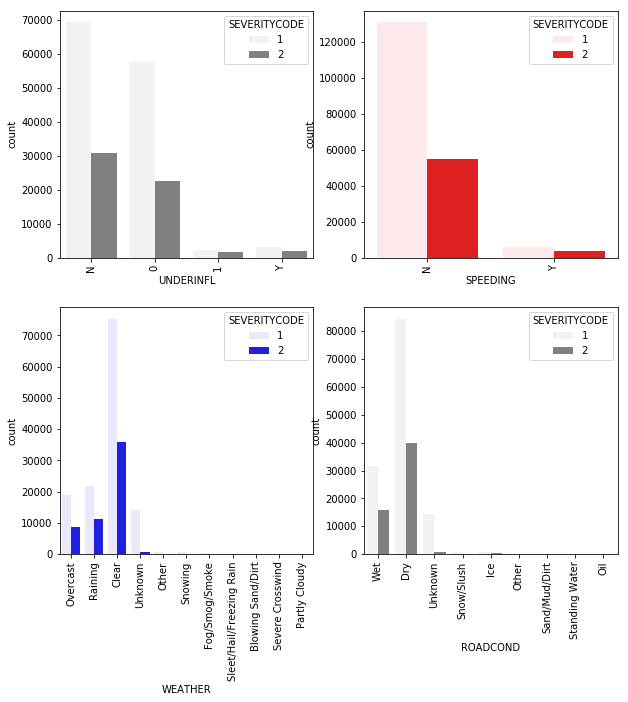

In [62]:
import matplotlib
matplotlib.colors
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='UNDERINFL',hue='SEVERITYCODE',data=df_exp, ax=ax[0,0],color="Grey")
sns.countplot(x='SPEEDING',hue='SEVERITYCODE',data=df_exp,ax=ax[0,1],color="Red")
sns.countplot(x='WEATHER',hue='SEVERITYCODE',data=df_exp,ax=ax[1,0],color="Blue")
sns.countplot(x='ROADCOND',hue='SEVERITYCODE',data=df_exp,ax=ax[1,1],color="Grey")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

## Summary

1. pedestrian and bicycle count showed obvious associations with injury rate, but these would make redundant features because collision type already captures these scenarios
2. meanwhile, contrary to expectation, Weather, Road and Light conditions didnt show remarkable patterns with respect to the rate of injury in collisions
3. featuress included - 'DATETIME', 'COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','SPEEDING','SEVERITYCODE'

In [63]:
df = df_exp[['DATETIME', 'COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','SPEEDING','SEVERITYCODE']].copy()
print(df.shape)
df.head()

(194673, 8)


,DATETIME,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE
0,2013-03-27 14:54:00,Angles,2,2,N,N,N,2
1,2006-12-20 18:55:00,Sideswipe,2,2,N,0,N,1
2,2004-11-18 10:20:00,Parked Car,4,3,N,0,N,1
3,2013-03-29 09:26:00,Other,3,3,N,N,N,1
4,2004-01-28 08:04:00,Angles,2,2,N,0,N,2


In [64]:

#lets check how many blank values there are in each column:
df.isnull().sum(axis=0)

DATETIME             0
COLLISIONTYPE     4904
PERSONCOUNT          0
VEHCOUNT             0
INATTENTIONIND       0
UNDERINFL         4884
SPEEDING             0
SEVERITYCODE         0
dtype: int64

In [65]:
df.dropna(axis=0,subset=['COLLISIONTYPE'],inplace=True)
df.isnull().sum(axis=0)

DATETIME          0
COLLISIONTYPE     0
PERSONCOUNT       0
VEHCOUNT          0
INATTENTIONIND    0
UNDERINFL         1
SPEEDING          0
SEVERITYCODE      0
dtype: int64

In [66]:
df.dropna(axis=0,subset=['UNDERINFL'],inplace=True)
print(df.shape)
df.isnull().sum(axis=0)

(189768, 8)


DATETIME          0
COLLISIONTYPE     0
PERSONCOUNT       0
VEHCOUNT          0
INATTENTIONIND    0
UNDERINFL         0
SPEEDING          0
SEVERITYCODE      0
dtype: int64

In [67]:
df['PERSONCOUNT'].value_counts()

2     111386
3      35138
4      14445
1      11727
5       6584
0       5541
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [68]:
#what is the VEHCOUNT distribution when the PERSONCOUNT = 0
df[df['PERSONCOUNT']==0]['VEHCOUNT'].value_counts()

2     4267
1      771
3      390
4       80
5       19
6        5
0        5
7        2
11       1
9        1
Name: VEHCOUNT, dtype: int64

In [69]:
#looking at severity proportion (injury vs property) of collisions before and after removing samples where PERSONCOUNT = 0
before = (df['SEVERITYCODE'].value_counts()[2]) / (df['SEVERITYCODE'].value_counts()[1])
after = (df[df['PERSONCOUNT']!=0]['SEVERITYCODE'].value_counts()[2])/(df[df['PERSONCOUNT']!=0]['SEVERITYCODE'].value_counts()[1])

print('Ratio of injury to property collisions for all samples (BEFORE): '+'{:.2f}'.format(before))
print('Ratio of injury to property collisions without PERSONCOUNT=0 samples (AFTER): '+'{:.2f}'.format(after))

Ratio of injury to property collisions for all samples (BEFORE): 0.43
Ratio of injury to property collisions without PERSONCOUNT=0 samples (AFTER): 0.43


### Observation: removing the samples where the PERSONCOUNT is recorded as 0 wont impact the proportionality of the target variable (SEVERITYCODE) and will still leave over 180k samples.. rather than have concern about the quality and impact of these records, lets remove them.

In [70]:
df = df[df['PERSONCOUNT']!=0]
print(df.shape)

(184227, 8)


In [71]:
#convert N to 0, Y to 1 in INATTENTIONIND, UNDERINFL and SPEEDING columns
df['SPEEDING'].replace(('Y','N'),(1,0),inplace=True)
df['INATTENTIONIND'].replace(('Y','N'),(1,0),inplace=True)
df['UNDERINFL'].replace(('Y','N'),(1,0),inplace=True)
df.head()

,DATETIME,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE
0,2013-03-27 14:54:00,Angles,2,2,0,0,0,2
1,2006-12-20 18:55:00,Sideswipe,2,2,0,0,0,1
2,2004-11-18 10:20:00,Parked Car,4,3,0,0,0,1
3,2013-03-29 09:26:00,Other,3,3,0,0,0,1
4,2004-01-28 08:04:00,Angles,2,2,0,0,0,2


In [72]:
#the existing 1s and 0s in the UNDERINFL column are strings and need to be converted to integers as well
df['UNDERINFL'].replace(('0','1'),(0,1),inplace=True)
df['UNDERINFL'].value_counts()

0    175107
1      9120
Name: UNDERINFL, dtype: int64

In [73]:
#add columns: PCOUNT_OVER2, VCOUNT_IS2 to track whether there are 3 or more people and whether there are 2 vehicles or other
df['PCOUNT_OVER2'] = [1 if b>=3 else 0 for b in df['PERSONCOUNT']]
df['VCOUNT_IS2'] = [1 if b==2 else 0 for b in df['VEHCOUNT']]
df.head()

,DATETIME,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PCOUNT_OVER2,VCOUNT_IS2
0,2013-03-27 14:54:00,Angles,2,2,0,0,0,2,0,1
1,2006-12-20 18:55:00,Sideswipe,2,2,0,0,0,1,0,1
2,2004-11-18 10:20:00,Parked Car,4,3,0,0,0,1,1,0
3,2013-03-29 09:26:00,Other,3,3,0,0,0,1,1,0
4,2004-01-28 08:04:00,Angles,2,2,0,0,0,2,0,1


In [74]:
#add column 'RUSHHOUR' to identify whether time is during the rushhour period on a weekday
wkdays = [0,1,2,3,4] #list of values that are weekdays
rushhrs = [5,6,7,8,15,16,17,18] #list of hours that are during AM/PM rushhour periouds (5-8 and 3-6)

df['RUSHHOUR'] = [1 if (b.hour in rushhrs) & (b.dayofweek in wkdays) else 0 for b in df.DATETIME]
df.head()

,DATETIME,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PCOUNT_OVER2,VCOUNT_IS2,RUSHHOUR
0,2013-03-27 14:54:00,Angles,2,2,0,0,0,2,0,1,0
1,2006-12-20 18:55:00,Sideswipe,2,2,0,0,0,1,0,1,1
2,2004-11-18 10:20:00,Parked Car,4,3,0,0,0,1,1,0,0
3,2013-03-29 09:26:00,Other,3,3,0,0,0,1,1,0,0
4,2004-01-28 08:04:00,Angles,2,2,0,0,0,2,0,1,1


In [75]:
#when first observing the dataset, the INCDTTM column had some dates that were missing a timestamp.. these could be
#incorrectly classified as non-rushhour, since we don't know the true times.. lets determine the number of impacted items
#and remove them

#first lets look at an example... in the first 10 rows of the dataframe, notice row 6, which has a timestamp of 00:00:00
#this is because the original INCDTTM column had only a date, so the timestamp defaults to 00:00:00 when converted to
#the datetime format
df.head(10)

,DATETIME,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PCOUNT_OVER2,VCOUNT_IS2,RUSHHOUR
0,2013-03-27 14:54:00,Angles,2,2,0,0,0,2,0,1,0
1,2006-12-20 18:55:00,Sideswipe,2,2,0,0,0,1,0,1,1
2,2004-11-18 10:20:00,Parked Car,4,3,0,0,0,1,1,0,0
3,2013-03-29 09:26:00,Other,3,3,0,0,0,1,1,0,0
4,2004-01-28 08:04:00,Angles,2,2,0,0,0,2,0,1,1
5,2019-04-20 17:42:00,Angles,2,2,0,0,0,1,0,1,0
6,2008-12-09 00:00:00,Angles,2,2,0,0,0,1,0,1,0
7,2020-04-15 17:47:00,Cycles,3,1,0,0,0,2,1,0,1
8,2006-06-15 13:00:00,Parked Car,2,2,0,0,0,1,0,1,0
9,2006-03-20 15:49:00,Angles,2,2,0,0,0,2,0,1,1


In [76]:
#lets remove these samples... first we need to set the index to the DATETIME column, then we can make use of the
#between_times method
df.set_index('DATETIME',inplace=True)
df.head()

,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PCOUNT_OVER2,VCOUNT_IS2,RUSHHOUR
DATETIME,,,,,,,,,,
2013-03-27 14:54:00,Angles,2,2,0,0,0,2,0,1,0
2006-12-20 18:55:00,Sideswipe,2,2,0,0,0,1,0,1,1
2004-11-18 10:20:00,Parked Car,4,3,0,0,0,1,1,0,0
2013-03-29 09:26:00,Other,3,3,0,0,0,1,1,0,0
2004-01-28 08:04:00,Angles,2,2,0,0,0,2,0,1,1


In [77]:

#now lets create a new df with the samples that fall between a time of 00:00:00 and 00:00:01
#this represents midnight and one second after midnight, and since the timestamp values only have hours and minutes
#it should only capture those samples where not time originally existed and the timestamp defaulted to 00:00:00
df2 = df.between_time('00:00:00','00:00:01')
print(df2.shape)
df2.head()

(25526, 10)


,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PCOUNT_OVER2,VCOUNT_IS2,RUSHHOUR
DATETIME,,,,,,,,,,
2008-12-09,Angles,2,2,0,0,0,1,0,1,0
2005-07-01,Left Turn,3,2,0,0,0,2,1,1,0
2009-06-01,Parked Car,2,2,0,0,0,1,0,1,0
2005-11-05,Left Turn,3,2,0,0,0,1,1,1,0
2006-08-05,Angles,2,2,0,0,0,1,0,1,0


In [78]:
#by spotchecking the original dataset, we can confirm that the 4 records above were originally lacking a time value
#lets overwrite the original dataframe to remove the 25526 rows in df2, where the timestamp is 00:00:00
#this can be done by swapping the start and end time values..

df = df.between_time('00:00:01','23:59:59')
#to check, the number of records should equal the previous size (184227) minus the size of df2 (25526) leaving 158701
print(df.shape)
#also notice how the old sample in row 6 has been removed and the record now has a timevalue
df.reset_index(inplace=True)
df.head(10)

(158701, 10)


,DATETIME,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PCOUNT_OVER2,VCOUNT_IS2,RUSHHOUR
0,2013-03-27 14:54:00,Angles,2,2,0,0,0,2,0,1,0
1,2006-12-20 18:55:00,Sideswipe,2,2,0,0,0,1,0,1,1
2,2004-11-18 10:20:00,Parked Car,4,3,0,0,0,1,1,0,0
3,2013-03-29 09:26:00,Other,3,3,0,0,0,1,1,0,0
4,2004-01-28 08:04:00,Angles,2,2,0,0,0,2,0,1,1
5,2019-04-20 17:42:00,Angles,2,2,0,0,0,1,0,1,0
6,2020-04-15 17:47:00,Cycles,3,1,0,0,0,2,1,0,1
7,2006-06-15 13:00:00,Parked Car,2,2,0,0,0,1,0,1,0
8,2006-03-20 15:49:00,Angles,2,2,0,0,0,2,0,1,1
9,2006-05-25 18:20:00,Other,2,2,0,0,0,1,0,1,1


In [79]:

#lets check what the distribution of collision severity was for each of the subsets...
#for the removed samples in df2
df2.reset_index(inplace=True)
print('Value counts for removed samples: \n',df2['SEVERITYCODE'].value_counts())
print('Ratio of injury to property collisions for removed samples: \n',(df2['SEVERITYCODE'].value_counts()[2])/(df2['SEVERITYCODE'].value_counts()[1]))
#for the remaining samples in the df
print('Value counts for remaining samples: \n',df['SEVERITYCODE'].value_counts())
print('Ratio of injury to property collisions for remaining samples: \n',(df['SEVERITYCODE'].value_counts()[2])/(df['SEVERITYCODE'].value_counts()[1]))

Value counts for removed samples: 
 1    18193
2     7333
Name: SEVERITYCODE, dtype: int64
Ratio of injury to property collisions for removed samples: 
 0.4030671137250591
Value counts for remaining samples: 
 1    110649
2     48052
Name: SEVERITYCODE, dtype: int64
Ratio of injury to property collisions for remaining samples: 
 0.4342741461739374


In [80]:
#lets look at the distribution of the removed samples by year...
df2.groupby(df2.DATETIME.dt.year).count()['SEVERITYCODE']

DATETIME
2004    3583
2005    4439
2006    4598
2007    4335
2008    4073
2009    3399
2010     126
2011     626
2012      24
2013      65
2014      54
2015      38
2016      62
2017      31
2018      45
2019      23
2020       5
Name: SEVERITYCODE, dtype: int64

In [81]:

#lets look at the distribution for the remaining samples
df.groupby(df.DATETIME.dt.year).count()['SEVERITYCODE']

DATETIME
2004     8165
2005    10594
2006    10559
2007    10119
2008     9587
2009     8335
2010    10664
2011    10286
2012    10201
2013     9881
2014    11470
2015    10411
2016    10524
2017     8065
2018     9854
2019     8730
2020     1256
Name: SEVERITYCODE, dtype: int64

### Observations:

the ratio of injury to property collisions is slightly higher for the remaining samples, however,     
it is still in line with the overall ratio of 0.43 injury collisions for every 1 property collision     
the removed samples come overwhelmingly from the years 2004-2009; perhaps historically the time of incident wasn't consistently recorded      
there is still ~160k samples remaining in the dataset, which could be used for training/testing     

In [82]:
#Then we can compile the final feature set.

features_df = df[['SEVERITYCODE','RUSHHOUR','PCOUNT_OVER2','VCOUNT_IS2','INATTENTIONIND','UNDERINFL','SPEEDING']]
features_df = pd.concat([features_df,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
print(features_df.shape)
features_df.head()

(158701, 17)


,SEVERITYCODE,RUSHHOUR,PCOUNT_OVER2,VCOUNT_IS2,INATTENTIONIND,UNDERINFL,SPEEDING,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


## 4.0 Balancing
Since there are more than 2x the number of property collisions (majority class) as there are injury collisions (minority class), the dataset should be balanced to avoid introducing bias to any models.

There are a number of ways to do this, including:

up-sampling the monority class   
down-sampling the majority class   
using other methods (Decision trees) or metrics (Area Under ROC Curve or Penalization Algorithms)   
For this project, we will use a number of these methods.   


The model will also be trained using a number of different methods, including a Decision Tree, in order to find the most effective model.   
Area under the curve will also be used as an evaluation metric, in addition to accuracy score, jaccard index, f1 and logloss   

In [83]:

#lets observe how unbalanced the dataset is...
features_df['SEVERITYCODE'].value_counts()

1    110649
2     48052
Name: SEVERITYCODE, dtype: int64

In [84]:
from sklearn.utils import resample

In [85]:
#create dataframes of the majority and minority classes
df_maj = features_df[features_df['SEVERITYCODE']==1]
df_min = features_df[features_df['SEVERITYCODE']==2]

print('Size of majority class: ', df_maj.shape)
print('Size of minority class: ', df_min.shape)

Size of majority class:  (110649, 17)
Size of minority class:  (48052, 17)


In [86]:
#downsample the majority class
#the number of samples (n_samples) is set to 48052 to match the minority class size
df_maj_down = resample(df_maj,replace=False,n_samples=48052,random_state=123)

df_bal = pd.concat([df_maj_down,df_min])

df_bal['SEVERITYCODE'].value_counts()

2    48052
1    48052
Name: SEVERITYCODE, dtype: int64

In [87]:
df_bal.reset_index(drop=True,inplace=True)
df_bal.head()

,SEVERITYCODE,RUSHHOUR,PCOUNT_OVER2,VCOUNT_IS2,INATTENTIONIND,UNDERINFL,SPEEDING,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [88]:
#now that the dataset is balanced, lets create our input feature and target variables..

#input features, X
X = df_bal.drop('SEVERITYCODE',axis=1)
X[0:5]

,RUSHHOUR,PCOUNT_OVER2,VCOUNT_IS2,INATTENTIONIND,UNDERINFL,SPEEDING,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [89]:
y = df_bal['SEVERITYCODE']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: SEVERITYCODE, dtype: int64

## 5.0 Modeling
Now that the data is cleansed, processed and balanced, some Machine Learning models can be trained. Since this project is dealing with classification, several different methods will be used, including:  

K Nearest Neighbor  
Decision Tree  
Support Vector Machines   
Logistic Regression   
First the data will be separated into train and test subsets. Some specific parameter tuning will be completed for each of the model types. Then the models will be evaluated using:

Simple accuracy score   
Jaccard index  
F1-score  
Log-loss  
Area Under the ROC Curve   
Note: since processed feature set is all one-hot encoding (0s and 1s) the input variables do not need to be normalized

In [90]:
#import the test-train method from sklearn and split the data.. this is necessary for all of the models
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [91]:

#using the test_train method, create test and train subsets of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (67272, 16) (67272,)
Test set: (28832, 16) (28832,)


# 5.0 MODELLING

###  5 Logistic Regression
For this algorithm we will look at modeling with liblinear, newton-cg and sag solvers. Some tuning may be required for the C parameter which controls regularization

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score as jaccard_score

In [93]:
targetNames = df_bal['SEVERITYCODE'].unique().tolist()

#### 5.1.a LR model using the liblinear solver

In [94]:
#train an LR model using the liblinear solver
LR_lib = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lib_pred = LR_lib.predict(X_test)
lib_prob = LR_lib.predict_proba(X_test)
print('Jaccard similarity for liblinear Logistic Regression: ', jaccard_score(y_test, lib_pred))
print('Logloss for liblinear Logistic Regression: ', log_loss(y_test, lib_prob))
print('Test Accuracy for liblinear: ',metrics.accuracy_score(y_test,lib_pred))
print(confusion_matrix(y_test,lib_pred,labels=targetNames))
print(classification_report(y_test,lib_pred))

Jaccard similarity for liblinear Logistic Regression:  0.7042869034406215
Logloss for liblinear Logistic Regression:  0.5427897193198256
Test Accuracy for liblinear:  0.7042869034406215
[[ 8263  6121]
 [ 2405 12043]]
              precision    recall  f1-score   support

           1       0.77      0.57      0.66     14384
           2       0.66      0.83      0.74     14448

   micro avg       0.70      0.70      0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.72      0.70      0.70     28832



### 5.1.b : LR model using the newton-cg solver

In [95]:
#train an LR model using the newton-cg solver
LR_newt = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
newt_pred = LR_newt.predict(X_test)
newt_prob = LR_newt.predict_proba(X_test)
print('Jaccard similarity for Newton-cg Logistic Regression: ', jaccard_score(y_test, newt_pred))
print('Logloss for Newtong-cg Logistic Regression: ', log_loss(y_test, newt_prob))
print('Test Accuracy for Newton-cg: ',metrics.accuracy_score(y_test,newt_pred))
print(confusion_matrix(y_test,newt_pred,labels=targetNames))
print(classification_report(y_test,newt_pred))

Jaccard similarity for Newton-cg Logistic Regression:  0.7042869034406215
Logloss for Newtong-cg Logistic Regression:  0.542792544122466
Test Accuracy for Newton-cg:  0.7042869034406215
[[ 8263  6121]
 [ 2405 12043]]
              precision    recall  f1-score   support

           1       0.77      0.57      0.66     14384
           2       0.66      0.83      0.74     14448

   micro avg       0.70      0.70      0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.72      0.70      0.70     28832



### 5.1.c : LR model using the sag3 solver

In [96]:
#train an LR model using the sag solver
LR_sag = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
sag_pred = LR_sag.predict(X_test)
sag_prob = LR_sag.predict_proba(X_test)
print('Jaccard similarity for sag Logistic Regression: ', jaccard_score(y_test, sag_pred))
print('Logloss for sag Logistic Regression: ', log_loss(y_test, sag_prob))
print('Test Accuracy for sag: ',metrics.accuracy_score(y_test,sag_pred))
print(confusion_matrix(y_test,sag_pred,labels=targetNames))
print(classification_report(y_test,sag_pred))

Jaccard similarity for sag Logistic Regression:  0.7042869034406215
Logloss for sag Logistic Regression:  0.5427926903579121
Test Accuracy for sag:  0.7042869034406215
[[ 8263  6121]
 [ 2405 12043]]
              precision    recall  f1-score   support

           1       0.77      0.57      0.66     14384
           2       0.66      0.83      0.74     14448

   micro avg       0.70      0.70      0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.72      0.70      0.70     28832



### Observation: the liblinear solver achieves slightly better Jaccard, Log-loss and simple accuracy scores.
Additionally, we see from looking at the confusion matrix that the liblinear model is slightly more balanced in predicting samples between the two classes.     
Lets look at whether we have the most optimum C value.

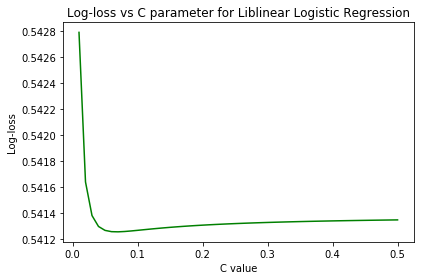

The best result is 0.5412554480316208 where C= 0.06999999999999999


In [97]:
#set up a for loop to iterate through multiple values for the C parameter
c_par = np.linspace(0.01,0.5,50) #set the C values that will be looped, 50 increments between C=0.01 and C=0.5

mean_log = np.zeros((len(c_par)))

for n in range(0,len(c_par)):
    LR_itr = LogisticRegression(C=c_par[n],solver='liblinear').fit(X_train,y_train)
    itr_prob = LR_itr.predict_proba(X_test)
    mean_log[n] = log_loss(y_test,itr_prob)
    
plt.plot(c_par,mean_log,'g')
plt.title('Log-loss vs C parameter for Liblinear Logistic Regression')
plt.ylabel('Log-loss')
plt.xlabel('C value')
plt.tight_layout()
plt.show()

print('The best result is', mean_log.min(), 'where C=', c_par[mean_log.argmin()])

In [98]:
LR_check = LogisticRegression(C=0.0699, solver='liblinear').fit(X_train,y_train)
pred_check = LR_check.predict(X_test)
prob_check = LR_check.predict_proba(X_test)

#evaluation metrics
print('Jaccard similarity for Logistic Regression with C=0.14: ', jaccard_score(y_test, pred_check))
print('Logloss for Logistic Regression with C=0.14: ', log_loss(y_test, prob_check))
print('Test Accuracy for LR with C=0.14: ',metrics.accuracy_score(y_test,pred_check))
print(confusion_matrix(y_test,pred_check,labels=targetNames))
print(classification_report(y_test,pred_check))

Jaccard similarity for Logistic Regression with C=0.14:  0.7047377913429522
Logloss for Logistic Regression with C=0.14:  0.5412554374126958
Test Accuracy for LR with C=0.14:  0.7047377913429522
[[ 8418  5966]
 [ 2547 11901]]
              precision    recall  f1-score   support

           1       0.77      0.59      0.66     14384
           2       0.67      0.82      0.74     14448

   micro avg       0.70      0.70      0.70     28832
   macro avg       0.72      0.70      0.70     28832
weighted avg       0.72      0.70      0.70     28832



In [99]:
#when comparing this to the original liblibear model (C=0.01), while the log-loss metric is improved, the jaccard
#and accuracy scores were slightly worse, and the confusion matrix had fewer correct predictions in both classes

#therefore, we'll keep the liblinear model with C=0.01 for final comparison with the other algorithms

LR_opt = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lr_pred = LR_opt.predict(X_test)
lr_prob = LR_opt.predict_proba(X_test)

print('Test set accuracy: ',metrics.accuracy_score(y_test,lr_pred))
print('Train set accuracy: ',metrics.accuracy_score(y_train,LR_opt.predict(X_train)))

Test set accuracy:  0.7042869034406215
Train set accuracy:  0.7041562611487692


# cross validation like KFold and Hyperparameter

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold,GridSearchCV
import numpy as np

In [102]:
log_class = LogisticRegression()

In [103]:
grid ={'C' : 10.0** np.arange(-2,3), 'penalty' :['l1','l2']}

In [104]:
cv = KFold(n_splits= 5 , random_state =None, shuffle=False)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7)

In [107]:
clf = GridSearchCV(log_class,grid,cv=cv,n_jobs =-1 , scoring='f1_macro')

In [108]:
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [109]:
y_pred = clf.predict(X_test)

In [110]:
print(confusion_matrix(y_test,y_pred))

[[ 8789  5660]
 [ 2950 11433]]


In [111]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7013734739178691
              precision    recall  f1-score   support

           1       0.75      0.61      0.67     14449
           2       0.67      0.79      0.73     14383

   micro avg       0.70      0.70      0.70     28832
   macro avg       0.71      0.70      0.70     28832
weighted avg       0.71      0.70      0.70     28832



# Random Forest Classifier

In [112]:
from sklearn.ensemble import  RandomForestClassifier

In [113]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
y_pred  = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8498  5951]
 [ 2639 11744]]
0.7020671476137624
              precision    recall  f1-score   support

           1       0.76      0.59      0.66     14449
           2       0.66      0.82      0.73     14383

   micro avg       0.70      0.70      0.70     28832
   macro avg       0.71      0.70      0.70     28832
weighted avg       0.71      0.70      0.70     28832



In [115]:
y_train.value_counts()

2    33669
1    33603
Name: SEVERITYCODE, dtype: int64

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7)

In [122]:
class_weight = dict({1:2,1:1})

## Modeling

In [123]:
classifier = RandomForestClassifier (class_weight = class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 1}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction
Let's make some predictions on the testing dataset 

In [124]:
y_pred  = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8449  5975]
 [ 2496 11912]]
0.7061945061043285
              precision    recall  f1-score   support

           1       0.77      0.59      0.67     14424
           2       0.67      0.83      0.74     14408

   micro avg       0.71      0.71      0.71     28832
   macro avg       0.72      0.71      0.70     28832
weighted avg       0.72      0.71      0.70     28832



In [125]:
y_train.value_counts()

2    33644
1    33628
Name: SEVERITYCODE, dtype: int64

In [ ]:
#git clone https://github.com/scikit-learn-contrib/imbalanced-learn.git
# cd imbalanced-learn

In [ ]:
#install imbalanced-learn

In [ ]:
from imblearn import under_sampling

# under sampling

In [128]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

ModuleNotFoundError: No module named 'imblearn'

# Decision Tree

In [141]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


In [145]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

## Modeling 

In [146]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [147]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction
Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [148]:
predTree = drugTree.predict(X_testset)

In [149]:
print (predTree [0:5])
print (y_testset [0:5])

[1 2 2 2 2]
16073    1
92833    2
81429    2
62241    2
54804    2
Name: SEVERITYCODE, dtype: int64


# Evaluation 
Next, let's import metrics from sklearn and check the accuracy of our model.

In [150]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6799042730299667


# KNN

Classification
K nearest neighbor (KNN)
Import library
Classifier implementing the k-nearest neighbors vote.

In [151]:
from sklearn.neighbors import KNeighborsClassifier

Training
Lets start the algorithm with k=4 for now:

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (76883, 16) (76883,)
Test set: (19221, 16) (19221,)


In [153]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

Predicting
we can use the model to predict the test set:

In [154]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 2, 1, 1])

# Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [155]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6556585981296256
Test set Accuracy:  0.6540242443161126


What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [156]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64590812, 0.63815618, 0.64715676, 0.65402424, 0.67587534,
       0.67129702, 0.67509495, 0.66775922, 0.68305499])

Plot model accuracy for Different number of Neighbors

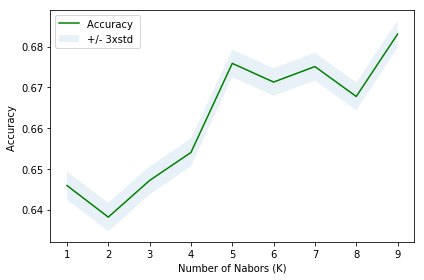

In [157]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [197]:
Ks = 260
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65, 0.64, 0.65, 0.65, 0.68, 0.67, 0.68, 0.67, 0.68, 0.67, 0.69,
       0.68, 0.69, 0.68, 0.68, 0.68, 0.7 , 0.69, 0.7 , 0.7 , 0.7 , 0.7 ,
       0.7 , 0.7 , 0.69, 0.69, 0.7 , 0.69, 0.7 , 0.69, 0.7 , 0.7 , 0.7 ,
       0.7 , 0.7 , 0.7 , 0.71, 0.7 , 0.7 , 0.7 , 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.7 , 0.7 , 0.7 , 0.71, 0.7 , 0.7 , 0.7 , 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.7 , 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.7 ,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.7 , 0.71, 0.7 , 0.7 , 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.

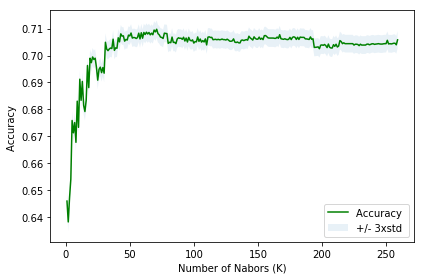

In [198]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [199]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7097965766609438 with k= 71


# SVM

In [160]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

# Train/Test dataset
Okay, we split our dataset into train and test set:

In [162]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (76883, 16) (76883,)
Test set: (19221, 16) (19221,)


In [185]:
from sklearn import svm

Modeling (SVM with Scikit-learn)
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [186]:
targetNames = df_bal['SEVERITYCODE'].unique().tolist()

In [187]:

#svm model with linear function
svm_lin = svm.SVC(kernel='linear').fit(X_train,y_train)
svm_pred1 = svm_lin.predict(X_test)
print('Test Accuracy for SVM with Linear kernel: ', metrics.accuracy_score(y_test,svm_pred1))

Test Accuracy for SVM with Linear kernel:  0.7044378544300505


In [188]:
#confusion matrix & classification report
print(confusion_matrix(y_test,svm_pred1,labels=targetNames))
print(classification_report(y_test,svm_pred1))

[[5895 3705]
 [1976 7645]]
              precision    recall  f1-score   support

           1       0.75      0.61      0.67      9600
           2       0.67      0.79      0.73      9621

   micro avg       0.70      0.70      0.70     19221
   macro avg       0.71      0.70      0.70     19221
weighted avg       0.71      0.70      0.70     19221



In [163]:
#from sklearn import svm
#clf = svm.SVC(kernel='rbf')
#clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [193]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 2, 2, 2, 1])

# Evaluation

In [165]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [190]:
 # (def plot_confusion_matrix(cm, classes,
 #                         normalize=False,
 #                         title='Confusion matrix',
 #                         cmap=plt.cm.Blues):
 #   """
 #   This function prints and plots the confusion matrix.
 #   Normalization can be applied by setting `normalize=True`.
 #   """
 #   if normalize:
 #       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 #       print("Normalized confusion matrix")
 #   else:
 #       print('Confusion matrix, without normalization')

 #   print(cm)

 #   plt.imshow(cm, interpolation='nearest', cmap=cmap)
 #   plt.title(title)
 #   plt.colorbar()
 #   tick_marks = np.arange(len(classes))
 #   plt.xticks(tick_marks, classes, rotation=45)
 #   plt.yticks(tick_marks, classes)

 #   fmt = '.2f' if normalize else 'd'
 #   thresh = cm.max() / 2.
 #   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
 #       plt.text(j, i, format(cm[i, j], fmt),
 #                horizontalalignment="center",
 #                color="white" if cm[i, j] > thresh else "black")

 #   plt.tight_layout()
 #   plt.ylabel('True label')
  #  plt.xlabel('Predicted label')

In [167]:
# plt.show()

In [189]:
# Compute confusion matrix
 #cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
#np.set_printoptions(precision=2)
 
#print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#### You can also easily use the f1_score from sklearn library:

In [195]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7038178796508854

In [196]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7081837573487332

### Modeling summary:
After training models using KNN, Decision Tree, Support Vector Machine and Logistic Regression methods, the optimimum models from each type are:

KNN: model w/ k=250 where a Test set accuracy of 0.70461 (simple accuracy) was achieved.   
Decision Tree: RandomForest model where Test set accuracy of 0.70507 was achieved.   
SVM: model with linear kernel function where Test set accuracy of 0.70257 was achieved.   
LR: model with liblinear solver and C parameter of 0.01 where Test set accuracy of 0.70599 was achieved.   
For all of these models, the accuracy achieved on the Test dataset is extremely close, and precision and recall metrics observed in the classification report are also very close. There are some differences spotted between the respective confusion matrices, in terms of the balance between samples predicted to the two different classes. All of the models predicted more injury collisions than property collisions, by at least 4400. The Decision Tree and Logistic Regression models where even more skewed towards predicting injury collisions (predicting 5000+ more injury collisions than property collisions). Depending on further development of a model and the intended benefit/use of any potential deployment, a model's ability to avoid certain incorrect predictions (in either class) or have more balance between the two classes may become more important.   

Lets look at a few more evaluation metrics and then summarize them for each model.

## 6.0 Model Evaluation
In this section we will evaluate the optimized model of each classification method using:

Jaccard similarity
F1-score
Log-loss
Area Under the ROC curve

In [171]:

#we have previously imported the jaccard, log-loss and f1 metrics, but there is one more we need to import
from sklearn.metrics import roc_auc_score

In [174]:
#the trained models and their predictions are above, but in order to properly use each of the listed metrics, probabilities
#for each test sample will need to be predicted for the KNN, Decision Tree and SVM models

#for reference, the respective models and predicted variables are commented below:

# KNN -- model: KNN_opt, predictions: knn_pred
# DT -- model: RDFT, predictions: DT_pred
# SVM -- model: SVM_opt, predictions: svm_pred
# LR -- model: LR_opt, predictions: lr_pred, probability predictions: lr_prob

#generate probability predictions for the KNN, Decision Tree and SVM models

## knn_prob = KNN_opt.predict_proba(X_test)
## DT_prob = RFDT.predict_proba(X_test)
svm_prob = SVM_opt.predict_proba(X_test)

NameError: name 'SVM_opt' is not defined

In [175]:

#calculate simple accuracy for each model
knn_acc = metrics.accuracy_score(y_test,knn_pred)
dt_acc = metrics.accuracy_score(y_test,DT_pred)
svm_acc = metrics.accuracy_score(y_test,svm_pred)
lr_acc = metrics.accuracy_score(y_test,lr_pred)


NameError: name 'knn_pred' is not defined

In [ ]:
#calculate jaccard similarity scores for each model
knn_jac = jaccard_score(y_test,knn_pred)
dt_jac = jaccard_score(y_test,DT_pred)
svm_jac = jaccard_score(y_test,svm_pred)
lr_jac = jaccard_score(y_test,lr_pred)

In [ ]:
#calculate f1-scores for each model
knn_f1 = jaccard_score(y_test,knn_pred,average='weighted')
dt_f1 = jaccard_score(y_test,DT_pred,average='weighted')
svm_f1 = jaccard_score(y_test,svm_pred,average='weighted')
lr_f1 = jaccard_score(y_test,lr_pred,average='weighted')

In [ ]:
#calculate log-loss for each model
knn_lgl = log_loss(y_test,knn_prob)
dt_lgl = log_loss(y_test,DT_prob)
svm_lgl = log_loss(y_test,svm_prob)
lr_lgl = log_loss(y_test,lr_prob)

In [ ]:
#calculate area under ROC for each model
knn_roc_prob = [p[1] for p in knn_prob]
knn_roc = roc_auc_score(y_test,knn_roc_prob)

In [ ]:
dt_roc_prob = [p[1] for p in DT_prob]
dt_roc = roc_auc_score(y_test,dt_roc_prob)


In [176]:
svm_roc_prob = [p[1] for p in svm_prob]
svm_roc = roc_auc_score(y_test,svm_roc_prob)


NameError: name 'svm_prob' is not defined

In [ ]:
lr_roc_prob = [p[1] for p in lr_prob]
lr_roc = roc_auc_score(y_test,lr_roc_prob)

In [177]:
results = {'KNN': ['k=250',knn_acc,knn_jac,knn_f1,knn_lgl,knn_roc]}

NameError: name 'knn_acc' is not defined

In [178]:
# results = {'Decision Tree': ['Random Forest',dt_acc,dt_jac,dt_f1,dt_lgl,dt_roc]}

NameError: name 'dt_acc' is not defined

In [ ]:
# results = {'SVM': ['linear kernel',svm_acc,svm_jac,svm_f1,svm_lgl,svm_roc]}

In [ ]:
# results = {'Logistic Regression': ['liblinear, C=0.01',lr_acc,lr_jac,lr_f1,lr_lgl,lr_roc]}

In [ ]:
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

In [ ]:
results_df

In [ ]:

#compile table of results to dictionary
results = {'KNN': ['k=250',knn_acc,knn_jac,knn_f1,knn_lgl,knn_roc],
          'Decision Tree': ['Random Forest',dt_acc,dt_jac,dt_f1,dt_lgl,dt_roc],
          'SVM': ['linear kernel',svm_acc,svm_jac,svm_f1,svm_lgl,svm_roc],
          'Logistic Regression': ['liblinear, C=0.01',lr_acc,lr_jac,lr_f1,lr_lgl,lr_roc]}

#read dictionary to dataframe
results_df = pd.DataFrame.from_dict(results,orient='index')
results_df.reset_index(drop=False, inplace=True)
results_df.columns = ['Algorithm','Model feature','Accuracy','Jaccard','F1-score','Log-loss','AUROC']

#display results
results_df

# Evaluation Summary:
The results are very similar for each of the different models.   
The Logistic Regression approach performed best for 3 of the 5 metrics: simple accuracy, F1 and AUROC, 
while the KNN algorithm was the best according to Jacard and Log-loss.    

Interestingly, despite performing best in 3 categories and second in another,  
the Logistic Regression model had the worst Jaccard similarity score of the 3 models.

Ultimately, the result are so similar that selecting a model might come down to its performance with respect to predicting against each classification.   
If being conservative - predicting fewer injury collisions is preferred - then the SVM or KNN models might be best,    
whereas the Logistic Regression and Decision Tree model might be preferable if higher sensitivity is required for predicting injury type collisions.